In [12]:
import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# tf.test.gpu_device_name() #run to make sure tensorflow is connected to gpu

import numpy as np
import pandas as pd
import cv2  
import os  
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show
%matplotlib inline

AttributeError: type object 'h5py.h5.H5PYConfig' has no attribute '__reduce_cython__'

In [13]:
import tensorflow as tf
tf.test.gpu_device_name()

AttributeError: type object 'h5py.h5.H5PYConfig' has no attribute '__reduce_cython__'

In [3]:
for i, img in tqdm(enumerate(os.listdir('cards/'))):
    label = i
    if img != '.ipynb_checkpoints':
        img = cv2.imread('cards/'+img, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (180, 180))
        imgs = img.reshape((1, img.shape[0], img.shape[1], 1))    
    


    
#     print(img.shape)
#     imshow(img)
#     show()
#     img = cv2.resize(img, (180, 180))

36it [00:00, 71.65it/s]


In [4]:
data=[]

for i, img in tqdm(enumerate(os.listdir('cards/'))):
    label=i
    img = cv2.imread('cards/'+img, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (180, 180))
    imgs = img.reshape((1, img.shape[0], img.shape[1], 1))
    data_generator = ImageDataGenerator(rotation_range=90, brightness_range=(0.5, 1.5), shear_range=15.0, zoom_range=[.3, .8])
    data_generator.fit(imgs)
    image_iterator = data_generator.flow(imgs)
    
    for x in range(750):
        img_transformed=image_iterator.next()[0].astype('int')/255
        data.append([img_transformed, label])

shuffle(data)

np.save('D:/ML/card cv/data.npy', data)

36it [01:20,  2.25s/it]
C:\Users\administrator\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [7]:
data = np.load('D:/ML/card cv/data.npy', allow_pickle=True)

In [10]:
data[0, 0].shape

(180, 180, 1)

In [5]:
train=data[:25000]
test=data[25000:]
# train = data[:2800]
# test = data[2800:]

train_X=[]
train_y=[]
for x in train:
    train_X.append(x[0]) 
    train_y.append(x[1])
    
test_X=[]
test_y=[]
for x in test:
    test_X.append(x[0]) 
    test_y.append(x[1])
    
train_X=np.array(train_X)
train_y=np.array(train_y)

test_X=np.array(test_X)
test_y=np.array(test_y)

In [6]:
train_X.shape

(25000, 180, 180, 1)

In [117]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

epochs=250
batch_size=32

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(train_X.shape[1], train_X.shape[2], train_X.shape[3])),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(52, activation='softmax')
])

model.summary()

cp = tf.keras.callbacks.ModelCheckpoint(filepath="250epochs_conv.h5",
                               save_best_only=True,
                               verbose=0)

model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, 
                    validation_data=(test_X, test_y), callbacks=[cp]).history

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       1

782/782 [==============================] - 30s 38ms/step - loss: 0.0288 - accuracy: 0.9993 - val_loss: 0.0634 - val_accuracy: 0.9990
Epoch 99/250
782/782 [==============================] - 30s 38ms/step - loss: 0.0439 - accuracy: 0.9989 - val_loss: 0.0132 - val_accuracy: 0.9995
Epoch 100/250
782/782 [==============================] - 30s 38ms/step - loss: 0.0292 - accuracy: 0.9989 - val_loss: 0.0113 - val_accuracy: 0.9995
Epoch 101/250
782/782 [==============================] - 30s 38ms/step - loss: 0.0549 - accuracy: 0.9991 - val_loss: 5.0164e-06 - val_accuracy: 1.0000
Epoch 102/250
782/782 [==============================] - 30s 38ms/step - loss: 0.0677 - accuracy: 0.9984 - val_loss: 0.1737 - val_accuracy: 0.9980
Epoch 103/250
782/782 [==============================] - 30s 38ms/step - loss: 0.0505 - accuracy: 0.9987 - val_loss: 0.0530 - val_accuracy: 0.9990
Epoch 104/250
782/782 [==============================] - 30s 38ms/step - loss: 0.0129 - accuracy: 0.9995 - val_loss: 0.0000e+00 -

782/782 [==============================] - 30s 38ms/step - loss: 0.0197 - accuracy: 0.9997 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 209/250
782/782 [==============================] - 30s 38ms/step - loss: 0.0218 - accuracy: 0.9996 - val_loss: 1.2935e-05 - val_accuracy: 1.0000
Epoch 210/250
782/782 [==============================] - 30s 38ms/step - loss: 0.0508 - accuracy: 0.9996 - val_loss: 0.0739 - val_accuracy: 0.9995
Epoch 211/250
782/782 [==============================] - 30s 38ms/step - loss: 0.0246 - accuracy: 0.9996 - val_loss: 0.1311 - val_accuracy: 0.9990
Epoch 212/250
782/782 [==============================] - 30s 38ms/step - loss: 0.0402 - accuracy: 0.9995 - val_loss: 0.0137 - val_accuracy: 0.9990
Epoch 213/250
782/782 [==============================] - 30s 38ms/step - loss: 0.0297 - accuracy: 0.9997 - val_loss: 0.0802 - val_accuracy: 0.9985
Epoch 214/250
782/782 [==============================] - 33s 42ms/step - loss: 0.0593 - accuracy: 0.9994 - val_loss: 2.8311e

C:\Users\administrator\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


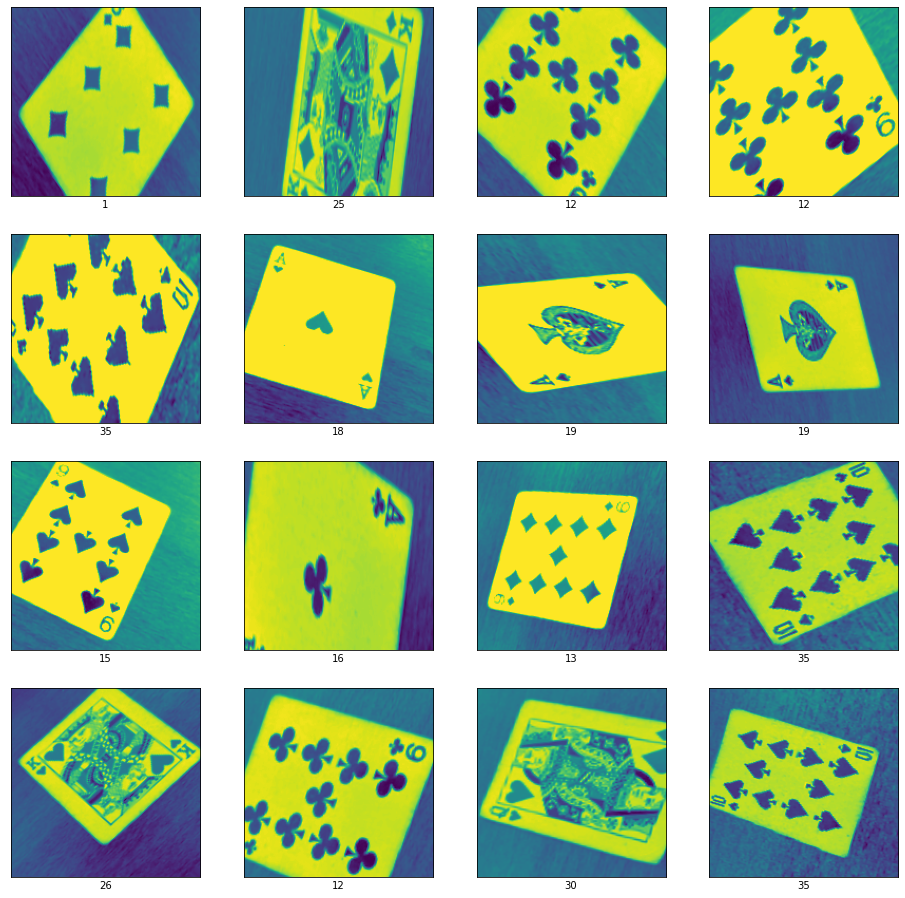

In [121]:
# df=pd.read_csv('card_labels.csv')
# labels=list(df['label'])

# labels = ['Seven of clubs', 'Eight of diamonds', 'Seven of diamonds', 'Ace of hearts']
labels = list(range(36))
predictions=model.predict_classes(test_X)

sample=test_X[:16]


plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample[i].reshape(sample.shape[1], sample.shape[2]))
    plt.xlabel(labels[predictions[i]])
plt.show()

In [122]:
test_X.shape

(2000, 180, 180, 1)

In [91]:
labels = []
for i, img in tqdm(enumerate(os.listdir('cards/'))):
    labels.append(img)

4it [00:00, ?it/s]


In [92]:
labels

['7c.png', '7d.png', '8d.png', 'Ah.png']

In [93]:
predictions=model.predict_classes(test_X)

In [94]:
predictions[:20]

array([2, 0, 1, 0, 3, 1, 3, 3, 2, 2, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2],
      dtype=int64)

In [120]:
model.save('cards_recognition_model_36_cards_only')

INFO:tensorflow:Assets written to: cards_recognition_model_36_cards_only\assets


In [96]:
# import pickle
# with open('cards_recognition_model.pickle', 'wb') as f:
#     pickle.dump(data, f)
# with open('cards_recognition_model.pickle', 'rb') as f:
#      cards_recognition_model = pickle.load(f)

In [97]:
for i, img in tqdm(enumerate(os.listdir('cards_test/'))):
    img = cv2.imread('cards_test/'+img, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (180, 180))
    imgs = img.reshape((1, img.shape[0], img.shape[1], 1))    

2it [00:00, 20.25it/s]


In [6]:
imshow(img)

NameError: name 'img' is not defined

In [99]:
predictions=model.predict_classes(imgs)

C:\Users\administrator\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [100]:
labels[predictions[0]]

'7d.png'

In [11]:
sample = test[5:6]
sample.shape
# plt.imshow(sample.reshape(sample.shape[1], sample.shape[2]))

(1, 2)